In [31]:
import pandas as pd
import numpy as np

In [44]:
train = pd.read_csv('fake_news_train.csv')

In [45]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [46]:
target = train['label']

In [47]:
features = train.drop('label', axis = 1)

In [48]:
features.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [49]:
train.shape

(20800, 5)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [51]:
train = train.dropna()

In [57]:
train.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [54]:
messages =  train.copy()

In [55]:
messages.reset_index(inplace = True) #resetting index after dropping null-vales

In [56]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [58]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [64]:
import re
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-B]', ' ', messages['title'][i])           #removing everything except a-z,A-Z
    review = review.lower()           #lower case to apply bag of word operations  
    review = review.split()            #splitting words to apply stopwords
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [65]:
corpus

['ous em aid e idn ven ee omey etter ntil ason haffetz weet',
 'illari linton big oman ampu breitbart',
 'hy ruth ight et ou ire',
 'ivilian ill n ingl airstrik ave dentifi',
 'ranian woman jail fiction unpublish stori woman stone death adulteri',
 'acki ason ollywood ould ove rump e bomb orth orea ack ran bathroom xclusiv ideo breitbart',
 'beno amon in rench ocialist arti residenti omin ew ork ime',
 'back hannel lan krain ussia ourtesi rump associ ew ork ime',
 'bama rganiz action artner oro ink ndivis isrupt rump agenda',
 'bb omedi ketch eal ousew aus utrag',
 'ussian esearch iscov ecret azi ilitari base reasur unter arctic hoto',
 'fficial ee ink rump ussia',
 'e es aid overn roll n ocial edia blog orum ebsit',
 'n ajor eagu occer argentin ind ome uccess ew ork ime',
 'ell argo hief abruptli tep ew ork ime',
 'anonym onor ay illion eleas veryon arrest akota access ipelin',
 'b lose n n illari',
 'huck odd buzz eed id onald rump olit avor breitbart',
 'onica ewinski linton ex cand

In [68]:
#applying CountVectorizer
cv = CountVectorizer(max_features = 5000, ngram_range = (1,3))
x = cv.fit_transform(corpus).toarray()

In [69]:
x.shape

(18285, 5000)

In [70]:
y = messages['label']

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [75]:
cv.get_feature_names()[:30]

['aa',
 'ab',
 'ab ew',
 'abandon',
 'abbi',
 'abduct',
 'abe',
 'abedin',
 'abel',
 'abinet',
 'abinet ick',
 'abit',
 'abl',
 'abor',
 'abort',
 'abotag',
 'abour',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abul',
 'abus',
 'abus ew',
 'abus ew ork',
 'ac',
 'academi',
 'acat',
 'acat ew',
 'acat ew ork']

In [77]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [78]:
count_df = pd.DataFrame(x_train, columns = cv.get_feature_names())

In [79]:
count_df.head()

,aa,ab,ab ew,abandon,abbi,abduct,abe,abedin,abel,abinet,...,yrian ar,yrian ar eport,yrian ebel,yrian efuge,yru,ystem,ysteri,ysteriou,yth,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
from sklearn.naive_bayes import MultinomialNB  #modelling
classifier = MultinomialNB()


In [86]:
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


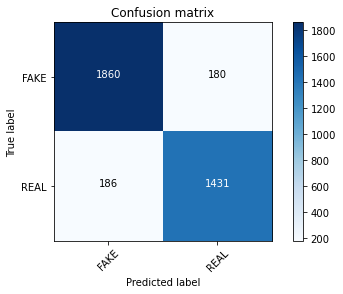

In [88]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
matrix = metrics.confusion_matrix(y_test, pred)

plot_confusion_matrix(matrix, classes = ['FAKE', 'REAL'])

In [89]:
print('score : ', score)

score :  0.8999179655455292


In [97]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter = 50)


score:  0.9207000273448182
Confusion matrix, without normalization


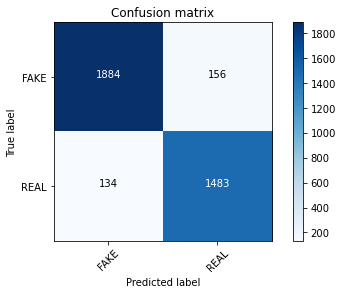

In [99]:
linear_clf.fit(x_train, y_train)
preds = linear_clf.predict(x_test)
print('score: ', metrics.accuracy_score(y_test, preds))
c_matrix = metrics.confusion_matrix(y_test, preds)
plot_confusion_matrix(c_matrix, classes = ['FAKE', 'REAL'])

In [102]:
classifier1=MultinomialNB(alpha=0.1)

In [110]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred=sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier1=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\dines\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8930817610062893
Alpha: 0.1, Score : 0.9004648619086683
Alpha: 0.2, Score : 0.9007383100902379
Alpha: 0.30000000000000004, Score : 0.9018321028165163
Alpha: 0.4, Score : 0.9021055509980859
Alpha: 0.5, Score : 0.9018321028165163
Alpha: 0.6000000000000001, Score : 0.9018321028165163
Alpha: 0.7000000000000001, Score : 0.9015586546349467
Alpha: 0.8, Score : 0.9010117582718075
Alpha: 0.9, Score : 0.9001914137270988


In [117]:
feats = cv.get_feature_names()

In [114]:
classifier1.coef_[0]

array([-8.87669024, -7.44437005, -9.21897644, ..., -8.51567689,
       -9.0332593 , -8.87669024])

In [115]:
sorted(zip(classifier.coef_[0], feats), reverse = True)[:20]

[(-3.9539626365798215, 'rump'),
 (-4.261569719594344, 'illari'),
 (-4.365830729918754, 'linton'),
 (-4.85004538633235, 'hat'),
 (-4.942026917357593, 'ew'),
 (-5.088227794044609, 'ay'),
 (-5.121575332217587, 'ill'),
 (-5.145598450420687, 'ow'),
 (-5.145598450420687, 'lection'),
 (-5.2440744558961345, 'omment'),
 (-5.3662269316783675, 'ar'),
 (-5.3970121244341085, 'illari linton'),
 (-5.5357250415253025, 'ou'),
 (-5.5357250415253025, 'mail'),
 (-5.561714030220577, 'bama'),
 (-5.5776379335773, 'ith'),
 (-5.626990053367027, 'orld'),
 (-5.638295996295305, 'ote'),
 (-5.643997266014261, 'onald'),
 (-5.678904824225063, 'ight')]

In [120]:
sorted(zip(classifier.coef_[0], feats))[:20]

[(-10.913572163696644, 'abour'),
 (-10.913572163696644, 'abroad'),
 (-10.913572163696644, 'abul'),
 (-10.913572163696644, 'abus ew'),
 (-10.913572163696644, 'abus ew ork'),
 (-10.913572163696644, 'acat'),
 (-10.913572163696644, 'acat ew'),
 (-10.913572163696644, 'acat ew ork'),
 (-10.913572163696644, 'ace breitbart'),
 (-10.913572163696644, 'ace ew ork'),
 (-10.913572163696644, 'achin ew'),
 (-10.913572163696644, 'achin ew ork'),
 (-10.913572163696644, 'ack ew'),
 (-10.913572163696644, 'ack ew ork'),
 (-10.913572163696644, 'acki'),
 (-10.913572163696644, 'acron'),
 (-10.913572163696644, 'act ew'),
 (-10.913572163696644, 'act ew ork'),
 (-10.913572163696644, 'ad ew'),
 (-10.913572163696644, 'ad ew ork')]